## <span style="color:blue">Project - Twitter US Airline Sentiment</span>
    - Amarpreet Bassan

### <span style="color:brown">Assumptions<span>

- The machine has [missingno](https://github.com/ResidentMario/missingno) package installed.
- This notebook is running on Python3 kernel.
- The machine has anaconda installed.
- The data file : Tweets.csv is in teh same folder.
- NLTK is installed in Anaconda environment.

### <span style="color:brown">Table Of Contents</span>
1. [Assumptions](#Assumptions)
2. [Import Section](#Import-Section)
3. [Reading and Understanding Dataset](#Reading-and-Understanding-the-Dataset---Section-Begins)
    - [Observations based on the Data Description and Understanding](#Observations-based-on-the-Data-description-and-Understanding)
4. [Text Preprocessing-Data Preparation](#Text-Preprocessing---Data-Preparation)
    - [HTML Tag Removal](#HTML-Tag-Removal)
    - [Sentence Tokenizer](#Sentence-tokenizer)
    - [Remove Numbers, Special Characters and Punctuations](#Remove-Numbers-Special-Characters-and-Punctuations)
    - [Convert To LowerCase](#Convert-to-lowercase)
    - [Lemmatize or Stemming](#Lemmatize-or-Stemming)
    - [Printing the result of Data Preprocessing](#Printing-the-result-of-Data-Preprocessing)
5. [Vectorizations](#Vectorization)
    - [CountVectorizer with 5000 Features](#Count-Vectorizer-with-5000-features)
    - [Classification Model for Count Vectorizer with 5000 features](#Classification-Model-for-Count-Vectorizer-with-5000-features)
    - [TFID Vectorizer with 5000 features](#TFID-Vectorizer-with-5000-features)
    - [Classification Model for TFID Vectorizer with 5000 features](#Classification-Model-for-TFID-Vectorizer-with-5000-features)
    - [CountVectorizer with 10000 Features](#Count-Vectorizer-with-10000-features)
    - [Classification Model for Count Vectorizer with 10000 Features](#Classification-Model-for-Count-Vectorizer-with-10000-features)
    
    - [TFID Vectorizer with 10000 Features](#TFID-Vectorizer-with-10000-features)
    - [Classification Model for TFID Vectorizer with 10000 Features](#Classification-Model-for-TFID-Vectorizer-with-10000-features)
    
6. [Summary of Observations](#Summary-of-Observations)
   

#### <span style="color:darkcyan">Import Section</span>
[Table of Contents](#Table-Of-Contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:4f}'.format
import missingno as msno
from sklearn import preprocessing
sns.set(color_codes = True)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#importing re
import re

#importing nltk
import nltk


#import stopwords
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

#import tokenize to split the statement to tokens

from nltk.tokenize import word_tokenize 

#importing beautiful soup 
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


Bad key "text.kerning_factor" on line 4 in
D:\anaconda_installation\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amarpb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amarpb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amarpb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### <span style="color:darkcyan">Reading and Understanding the Dataset - Section Begins</span>
[Table of Contents](#Table-Of-Contents)

In [2]:
#we create the analytics base table as follows :
abt = pd.read_csv('Tweets.csv')

In [3]:
#create a copy of the abt for preparing the data for modelling.

wdf = abt.copy()

In [4]:
#getting the shape of the data
wdf.shape

(14640, 15)

In [5]:
#reading the first 5 rows of the dataframe.

wdf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.000000,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.348600,NaN,0.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.683700,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.000000,Bad Flight,0.703300,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.000000,Can't Tell,1.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#getting the information about the dataframe.

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

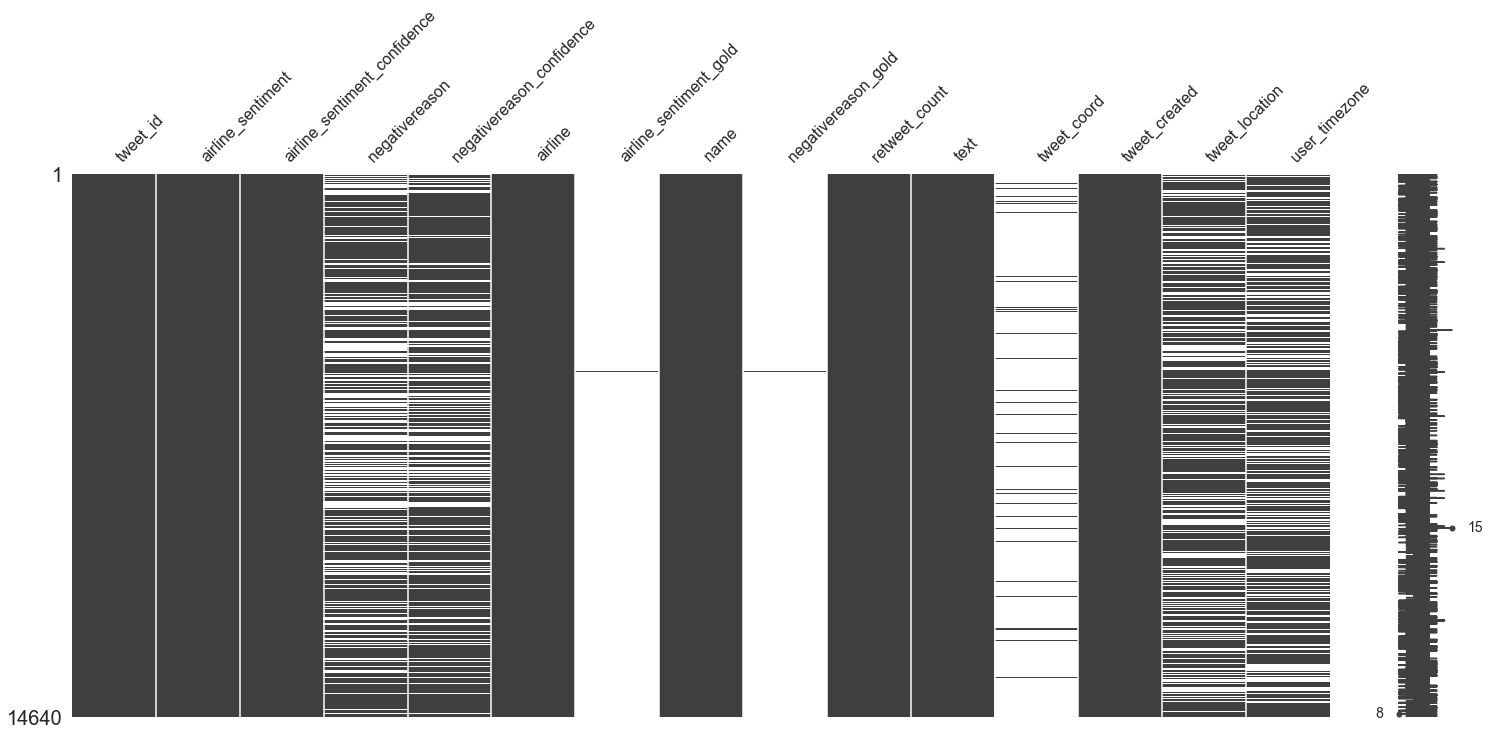

In [7]:
#getting the missing value.
msno.matrix(wdf)

In [8]:
wdf[wdf.airline_sentiment_confidence != 1]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.348600,NaN,0.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.683700,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
6,570300616901320704,positive,0.674500,NaN,0.000000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.634000,NaN,nan,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.655900,NaN,nan,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,569590013278756865,positive,0.627400,NaN,0.000000,American,NaN,Flora_Lola_NYC,NaN,0,@AmericanAir Love the new planes for the JFK-L...,NaN,2015-02-22 12:10:16 -0800,NaN,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.676000,NaN,0.000000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14634,569587691626622976,negative,0.668400,Late Flight,0.668400,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.348700,NaN,0.000000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN


#### <span style="color:darkcyan">Observations based on the Data description and Understanding</span>
[Table of Contents](#Table-Of-Contents)
 - The fields text and airline_sentiment does not have any null columns.
 - Airline_sentiment_confidence also has complete values.
 - There are some values for Airline_sentiment_confidence which is less than 0.5 but for the purpose of this project , we will assume that the airline_sentiment is the final sentiment score.
 - There are 15 columns overall and 14640 rows in the dataset.

#### <span style="color:darkcyan">Reading the Dataset - Section Ends</span>
[Table of Contents](#Table-Of-Contents)

In [9]:
#we will now create a working dataframe for our further analysis
basedf = wdf[['text', 'airline_sentiment']]

In [10]:
#we check the shape of the data
basedf.shape

(14640, 2)

In [11]:
basedf.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


#### <span style="color:darkcyan">Text Preprocessing - Data Preparation</span>
[Table of Contents](#Table-Of-Contents)

#### <span style="color:darkcyan">HTML Tag Removal</span>
[Table of Contents](#Table-Of-Contents)

In [12]:
#html tag removal
def htmltagremoval(text):
    return BeautifulSoup(text).get_text()

In [13]:
#removing the html from a column
basedf['textwithhtmlremoved'] = basedf['text'].apply(htmltagremoval)

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
basedf['textwithhtmlremoved'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: textwithhtmlremoved, dtype: object

#### <span style="color:darkcyan">Sentence tokenizer</span>
[Table of Contents](#Table-Of-Contents)

In [15]:
#we create a function to be applied to the textwithhtmlremoved column
def functokenizer(text):
    return nltk.word_tokenize(text)

In [16]:
#we add a column to the base dataframe
basedf['sentencetokenized'] = basedf['textwithhtmlremoved'].apply(functokenizer)

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
basedf['sentencetokenized'].head()

0       [@, VirginAmerica, What, @, dhepburn, said, .]
1    [@, VirginAmerica, plus, you, 've, added, comm...
2    [@, VirginAmerica, I, did, n't, today, ..., Mu...
3    [@, VirginAmerica, it, 's, really, aggressive,...
4    [@, VirginAmerica, and, it, 's, a, really, big...
Name: sentencetokenized, dtype: object

#### <span style="color:darkcyan">Remove Numbers Special Characters and Punctuations</span>
[Table of Contents](#Table-Of-Contents)

In [18]:
#we define a function using the regular experssion to remove numbers, special characters and punctuations
#joining the list to form a sentence
def create_string(words_list):
    return ' '.join(words_list)




import re


def remove_special_charcters_and_punctuation(text):
    pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [19]:
basedf['textwithpuncremoved'] = basedf['sentencetokenized'].apply(create_string).apply(remove_special_charcters_and_punctuation)

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
basedf['textwithpuncremoved']

0                       VirginAmerica What  dhepburn said 
1         VirginAmerica plus you ve added commercials t...
2         VirginAmerica I did nt today  Must mean I nee...
3         VirginAmerica it s really aggressive to blast...
4         VirginAmerica and it s a really big bad thing...
                               ...                        
14635     AmericanAir thank you we got on a different f...
14636     AmericanAir leaving over  minutes Late Flight...
14637     AmericanAir Please bring American Airlines to...
14638     AmericanAir you have my money  you change my ...
14639     AmericanAir we have  ppl so we need  know how...
Name: textwithpuncremoved, Length: 14640, dtype: object

#### <span style="color:darkcyan">Convert to lowercase</span>
[Table of Contents](#Table-Of-Contents)

In [21]:
#we define a function to Convert lowercase
def to_lowercase(text):
    return text.lower()
    

In [22]:
basedf['sentlowercase'] = basedf['textwithpuncremoved'].apply(to_lowercase)

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
basedf['sentlowercase'].head()

0                   virginamerica what  dhepburn said 
1     virginamerica plus you ve added commercials t...
2     virginamerica i did nt today  must mean i nee...
3     virginamerica it s really aggressive to blast...
4     virginamerica and it s a really big bad thing...
Name: sentlowercase, dtype: object

#### <span style="color:darkcyan">Lemmatize or Stemming</span>
[Table of Contents](#Table-Of-Contents)

In [24]:
#we will lemmatize the string as stemming often might result in loosing the actual context of the statement.
#we will use the following link as reference because we want to lemmatize the entire sentence.
#https://medium.com/@gaurav5430/using-nltk-for-lemmatizing-sentences-c1bfff963258 

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [25]:
basedf['lemmatizedsent'] = basedf['sentlowercase'].apply(lemmatize_sentence)

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### <span style="color:darkcyan">Printing the result of Data Preprocessing</span>
[Table of Contents](#Table-Of-Contents)

In [26]:
basedf['lemmatizedsent'].head()

0                      virginamerica what dhepburn say
1    virginamerica plus you ve added commercial to ...
2    virginamerica i do nt today must mean i need t...
3    virginamerica it s really aggressive to blast ...
4    virginamerica and it s a really big bad thing ...
Name: lemmatizedsent, dtype: object

In [27]:
#we convert lemmatizedsent to list of reviews.

cleaned_reviews = basedf['lemmatizedsent'].to_list()

In [28]:
#print the first 5 elements of cleaned_reviews
cleaned_reviews[:5]

['virginamerica what dhepburn say',
 'virginamerica plus you ve added commercial to the experience tacky',
 'virginamerica i do nt today must mean i need to take another trip',
 'virginamerica it s really aggressive to blast obnoxious `` entertainment in your guest face they have little recourse',
 'virginamerica and it s a really big bad thing about it']

In [29]:
#convert the sentiment column to categorical
basedf['airline_sentiment'] = basedf['airline_sentiment'].astype('category')

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
basedf['sentiment'] = basedf['airline_sentiment'].cat.codes

D:\anaconda_installation\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
basedf['sentiment'].head()

0    1
1    2
2    1
3    0
4    0
Name: sentiment, dtype: int8

#### <span style="color:darkcyan">Vectorization</span>
[Table of Contents](#Table-Of-Contents)

#### <span style="color:darkcyan">Count Vectorizer with 5000 features</span>
[Table of Contents](#Table-Of-Contents)

In [32]:
print ("Creating the bag of words...using countvectorizer\n....")

# Initialize the "CountVectorizer" object @ 

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(cleaned_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...using countvectorizer
....


In [33]:
#print the top 5 rows of train_data_features
train_data_features[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### <span style="color:darkcyan">Classification Model for Count Vectorizer with 5000 features</span>
[Table of Contents](#Table-Of-Contents)

In [34]:
#let us use randomforestclassifier and test the accuracy using the cross_val_score

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(verbose=2,n_jobs=3,n_estimators = 100) 
# We will now train the random forest and print the average score
print ("Training the random forest...")
forest = forest.fit( train_data_features, basedf['sentiment'] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,train_data_features,basedf["sentiment"],cv=10)))

Training the random forest...


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    6.7s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   19.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   12.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   26.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   20.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.1s
[Parallel(n_jobs=3)]: Done 100

0.7370167621393052


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


#### <span style="color:darkcyan">TFID Vectorizer with 5000 features</span>
[Table of Contents](#Table-Of-Contents)

In [35]:
print ("Creating the bag of words...using TfidfVectorizer\n....")

# Initialize the "TfidfVectorizer" object @ 

tfidvectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfid_train_data_features = tfidvectorizer.fit_transform(cleaned_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfid_train_data_features = tfid_train_data_features.toarray()

Creating the bag of words...using TfidfVectorizer
....


#### <span style="color:darkcyan">Classification Model for TFID Vectorizer with 5000 features</span>
[Table of Contents](#Table-Of-Contents)

In [36]:
#let us use randomforestclassifier and test the accuracy using the cross_val_score

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(verbose=2,n_jobs=3,n_estimators = 100) 
# We will now train the random forest and print the average score
print ("Training the random forest...")
forest = forest.fit( tfid_train_data_features, basedf['sentiment'] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,tfid_train_data_features,basedf["sentiment"],cv=10)))

Training the random forest...


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    8.0s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   22.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    8.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   23.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    8.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   23.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    9.0s
[Parallel(n_jobs=3)]: Done 100

0.7290940073674859


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


#### <span style="color:darkcyan">Count Vectorizer with 10000 features</span>
[Table of Contents](#Table-Of-Contents)

In [72]:
#we increase th number of features from 5000 to 10000
#for countvectorizer

print ("Creating the bag of words...using countvectorizer\n....")

# Initialize the "CountVectorizer" object @ 

countvectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_train_data_features = countvectorizer.fit_transform(cleaned_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
count_train_data_features = count_train_data_features.toarray()

Creating the bag of words...using countvectorizer
....


#### <span style="color:darkcyan">TFID Vectorizer with 10000 features</span>
[Table of Contents](#Table-Of-Contents)

In [73]:
print ("Creating the bag of words...using TfidfVectorizer\n....")

# Initialize the "TfidfVectorizer" object @ 

tfidvectorizer_10000 = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfid_10000_train_data_features = tfidvectorizer_10000.fit_transform(cleaned_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfid_10000_train_data_features = tfid_10000_train_data_features.toarray()

Creating the bag of words...using TfidfVectorizer
....


#### <span style="color:darkcyan">Classification Model for Count Vectorizer with 10000 features</span>
[Table of Contents](#Table-Of-Contents)

In [74]:
#using random forest for countvectorizer
#let us use randomforestclassifier and test the accuracy using the cross_val_score

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(verbose=2,n_jobs=3,n_estimators = 100) 
# We will now train the random forest and print the average score
print ("Training the random forest...")
forest = forest.fit( count_train_data_features, basedf['sentiment'] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,count_train_data_features,basedf["sentiment"],cv=10)))

Training the random forest...


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   11.9s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   34.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   37.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   13.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   35.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   12.7s
[Parallel(n_jobs=3)]: Done 100

0.735171986392149


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


#### <span style="color:darkcyan">Classification Model for TFID Vectorizer with 10000 features</span>
[Table of Contents](#Table-Of-Contents)

In [75]:
#using random forest for tfid
#let us use randomforestclassifier and test the accuracy using the cross_val_score

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(verbose=2,n_jobs=3,n_estimators = 100) 
# We will now train the random forest and print the average score
print ("Training the random forest...")
forest = forest.fit( tfid_10000_train_data_features, basedf['sentiment'] )
# random forest performance through cross vaidation 
print (forest)
print (np.mean(cross_val_score(forest,tfid_10000_train_data_features,basedf["sentiment"],cv=10)))

Training the random forest...


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   12.4s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100building tree 55 of 100

building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   35.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   14.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   40.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   14.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   38.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   14.1s
[Parallel(n_jobs=3)]: Done 100

0.7295015096828801


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


#### <span style="color:darkcyan">Summary of Observations</span>
[Table of Contents](#Table-Of-Contents)

- The following are the accuracy metrics seen in the different number of features:

|Number of Features|Vectorizer|Cross Val Score|
|:----|:----|:-----|
|5000 |Count|0.7370|
|10000|Count|0.7351|
|5000 |TFID |0.7290|
|10000|TFID |0.7295|


- There is a difference in the behavior of Count and TFID vectorizer.
- Count vectorizer reduces in accuracy as the number of feature increases.
- TFID vectorizer increases in accuracy as the number of features increases.
- This can be attributed to the fact that the TFID takes the frequency of the word in every document whereas count vectorizer only frames the dictionary based on the frequency observed in a single document.
- There are lot of opportunities to further refine the approach that I adopted in this project:
  - I have not removed the stop words. they might account for some of the word in the frequency dictionary.
  - I did not take the airline sentiment confidence into perspective. That might alter the sentiment score and the word frequency for the vectorizer.
  - I have not used the word stemmer, as a result , i have the words that are shortened and tokenized. there is an opportunity for further refining the tokenized words.
  - There is an opportunity to run a grid search on the number of esitmators for the classifier. currently we have run it for only 100 estimators.